<a href="https://colab.research.google.com/github/JennyRivas/deteccion-plastico-vision-artificial/blob/main/Clasificaci%C3%B3n_de_residuos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import PIL.Image
import requests
from io import BytesIO

In [ ]:
MODEL_URL = "https://teachablemachine.withgoogle.com/models/VwFHFAhzI/"
MODEL_PATH = MODEL_URL + "model.json"

In [ ]:
import tensorflow_hub as hub

# Replace this URL with the actual direct download link to your model file
# from your Teachable Machine export page. It might end in .zip or point
# to a directory containing the model files.
model_url = 'https://teachablemachine.withgoogle.com/models/VwFHFAhzI/model.zip' # Example URL - REPLACE WITH YOUR ACTUAL LINK

try:
    # hub.load can sometimes accept directory paths if the model is uncompressed.
    # If the direct download is a zip file, you might need to download and extract
    # it manually first, then provide the path to the extracted directory to hub.load.
    # However, TensorFlow Hub's compressed module resolver is often designed to
    # handle compressed archives directly if the URL points to the file.
    model = hub.load(model_url)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Please ensure the URL points directly to the downloadable model file.")
    print("Check your Teachable Machine export options for the exact download link.")

Error loading model: HTTP Error 404: Not Found
Please ensure the URL points directly to the downloadable model file.
Check your Teachable Machine export options for the exact download link.


In [ ]:
!pip install gdown

In [ ]:
import gdown

# ID del archivo de Google Drive (debes reemplazar con el tuyo)
file_id = "1AbCdEFgHiJKLmNoPQRstuVWxyZ123456"

# Descarga el archivo .zip
gdown.download(f"https://drive.google.com/uc?id={file_id}", "modelo_teachable.zip", quiet=False)


In [ ]:
import gdown

# ID del archivo de Google Drive (debes reemplazar con el tuyo)
file_id = "15JRGZ5bQzlOVpK6oNfQO4jQ_zpM5mx53"

In [ ]:
import gdown

# ID del archivo de Google Drive (debes reemplazar con el tuyo)
file_id = "15JRGZ5bQzlOVpK6oNfQO4jQ_zpM5mx53"

# Descarga el archivo .zip
# Ensure the Google Drive file has permissions set to 'Anyone with the link'
try:
    gdown.download(f"https://drive.google.com/uc?id={file_id}", "modelo_teachable.zip", quiet=False)
    print("File downloaded successfully.")
except gdown.exceptions.FileURLRetrievalError as e:
    print(f"Error downloading file: {e}")
    print("Please check the Google Drive file permissions.")
    print("Ensure the file is shared with 'Anyone with the link'.")
    print(f"You can try accessing it directly in a browser: https://drive.google.com/uc?id={file_id}")

Error downloading file: Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=15JRGZ5bQzlOVpK6oNfQO4jQ_zpM5mx53

but Gdown can't. Please check connections and permissions.
Please check the Google Drive file permissions.
Ensure the file is shared with 'Anyone with the link'.
You can try accessing it directly in a browser: https://drive.google.com/uc?id=15JRGZ5bQzlOVpK6oNfQO4jQ_zpM5mx53


In [ ]:
ruta = 'https://drive.google.com/drive/folders/15JRGZ5bQzlOVpK6oNfQO4jQ_zpM5mx53?usp=drive_link'


In [ ]:
!ls '/content/drive/MyDrive/tm-my-image-model'


ls: cannot access '/content/drive/MyDrive/tm-my-image-model': No such file or directory


In [ ]:
!pip install -U gdown
import gdown

# Descargar todos los archivos de la carpeta
gdown.download_folder('https://drive.google.com/drive/folders/15JRGZ5bQzlOVpK6oNfQO4jQ_zpM5mx53', quiet=False, use_cookies=False)


Retrieving folder contents


Processing file 17ngTlb4fD9DaBKMy6K5F500_i_Z7JIiF metadata.json
Processing file 13WOn9U1H-T2Qw_m5haUDLShRy_mTC1Zy model.json
Processing file 1AuUtWXuau-jCe0gnd7TSyJHkEG8qLN9C weights.bin


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=17ngTlb4fD9DaBKMy6K5F500_i_Z7JIiF
To: /content/tm-my-image-model/metadata.json
100%|██████████| 274/274 [00:00<00:00, 931kB/s]
Downloading...
From: https://drive.google.com/uc?id=13WOn9U1H-T2Qw_m5haUDLShRy_mTC1Zy
To: /content/tm-my-image-model/model.json
100%|██████████| 91.8k/91.8k [00:00<00:00, 65.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AuUtWXuau-jCe0gnd7TSyJHkEG8qLN9C
To: /content/tm-my-image-model/weights.bin
100%|██████████| 2.15M/2.15M [00:00<00:00, 188MB/s]
Download completed


['/content/tm-my-image-model/metadata.json',
 '/content/tm-my-image-model/model.json',
 '/content/tm-my-image-model/weights.bin']

In [ ]:
def preprocess_image(image_path, image_size=(224, 224)):
    image = PIL.Image.open(image_path).convert('RGB')
    image = image.resize(image_size)
    image_array = np.array(image) / 255.0  # Normalizar
    image_array = np.expand_dims(image_array, axis=0)  # Añadir dimensión batch
    return image_array

In [ ]:
def predict(image_path):
    image = preprocess_image(image_path)
    prediction = model(image)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    print(f"Clase predicha: {predicted_class}, Confianza: {confidence:.2f}")

In [ ]:
# Lista con nombres de las clases, en el mismo orden que en Teachable Machine
class_names = ["Orgánico", "Reciclable", "No reciclable"]  # Reemplaza según tu modelo

# Luego cambia la función predict así:
def predict(image_path):
    image = preprocess_image(image_path)
    prediction = model(image)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    print(f"Clase predicha: {class_names[predicted_class]}, Confianza: {confidence:.2f}")


In [ ]:
!pip install tensorflow tensorflowjs

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
from google.colab import files
import io

In [ ]:
class_names = ["Organico", "Reciclable", "No reciclble"]  # Cambia esto según tu modelo

In [ ]:
uploaded = files.upload()

Saving model.json to model (1).json
Saving weights.bin to weights (1).bin


In [ ]:
import tensorflowjs as tfjs

In [ ]:
model_path = "/content/model (1).json"  # Cambia si subes un archivo con otro nombre
model = tfjs.converters.load_keras_model(model_path)


In [ ]:
uploaded_image = files.upload()

Saving organico1.jpg to organico1.jpg


In [ ]:
for file_name in uploaded_image.keys():
    img = Image.open(io.BytesIO(uploaded_image[file_name])).convert('RGB')
    img = img.resize((224, 224))  # Tamaño estándar para modelos Teachable Machine
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Añadir dimensión de batch

In [ ]:
prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    confidence = np.max(prediction)

IndentationError: unexpected indent (<ipython-input-37-80bc5fba86f2>, line 2)

In [ ]:
# Continue from the previous cell where the loop was started
for file_name in uploaded_image.keys():
    img = Image.open(io.BytesIO(uploaded_image[file_name])).convert('RGB')
    img = img.resize((224, 224))  # Tamaño estándar para modelos Teachable Machine
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Añadir dimensión de batch

    # These lines should be inside the loop to process each uploaded image
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    confidence = np.max(prediction)

    # You might want to print the results for each image here
    print(f"Processing {file_name}:")
    print(f"Prediction probabilities: {prediction}")
    print(f"Predicted class index: {predicted_index}")
    print(f"Confidence: {confidence:.2f}")

    # Use the class_names list to get the actual class name (assuming it's defined earlier)
    if 'class_names' in globals() and 0 <= predicted_index < len(class_names):
        predicted_class_name = class_names[predicted_index]
        print(f"Predicted class name: {predicted_class_name}")
    else:
         print("Class names not defined or index out of bounds.")

1/1 [==============================] - 1s 1s/step
Processing organico1.jpg:
Prediction probabilities: [[0.9883576  0.00140043 0.01024202]]
Predicted class index: 0
Confidence: 0.99
Predicted class name: Organico


In [ ]:
print(f"Clase predicha: {class_names[predicted_index]} - Confianza: {confidence:.2f}")

Clase predicha: Organico - Confianza: 0.99


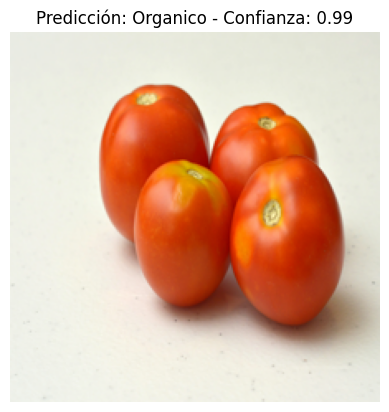

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(f"Predicción: {class_names[predicted_index]} - Confianza: {confidence:.2f}")
plt.axis('off')
plt.show()